In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
N_LAYERS = 32
zsl = pd.read_csv('2024-03-26-Exp1000Prompts/ZSL.csv')
no_perm = pd.read_csv('2024-03-26-Exp1000Prompts/NoPerm.csv')
one_layer_perm = pd.read_csv('2024-03-26-Exp1000Prompts/OneLayerPerm.csv')
from_layer_perm = pd.read_csv('2024-03-26-Exp1000Prompts/FromLayerPerm.csv')

summary = pd.DataFrame(columns=['Layer', 'ZSL', 'ICL No Perm', 'One Perm', 'Cascading Perms'])
summary['Layer'] = list(range(N_LAYERS))
icl_base_acc = no_perm['Correct'].mean()
zsl_base_acc = zsl['Correct'].mean()
summary['ZSL'] = [zsl_base_acc] + [pd.NA]*(N_LAYERS-1)
summary['ICL No Perm'] = [icl_base_acc] + [pd.NA]*(N_LAYERS-1)
summary['One Perm'] = one_layer_perm.groupby(by='Perm In Layer', as_index=False)['Correct'].mean().sort_values(by='Perm In Layer', ascending=True)['Correct']
summary['Cascading Perms'] = from_layer_perm.groupby(by='Perm From Layer', as_index=False)['Correct'].mean().sort_values(by='Perm From Layer', ascending=True)['Correct']
summary.to_csv('2024-03-26-Exp1000Prompts/Summary.csv')
summary

,Layer,ZSL,ICL No Perm,One Perm,Cascading Perms
0,0,0.469,0.841,0.832,0.674
1,1,<NA>,<NA>,0.844,0.681
2,2,<NA>,<NA>,0.836,0.677
3,3,<NA>,<NA>,0.830,0.701
4,4,<NA>,<NA>,0.856,0.772
5,5,<NA>,<NA>,0.814,0.749
6,6,<NA>,<NA>,0.813,0.796
7,7,<NA>,<NA>,0.802,0.807
8,8,<NA>,<NA>,0.827,0.842
9,9,<NA>,<NA>,0.805,0.847


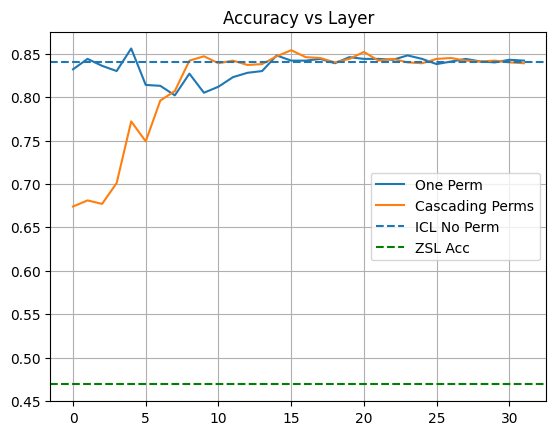

In [3]:
fig, ax = plt.subplots(1)
ax.plot(summary['Layer'], summary['One Perm'], label='One Perm')
ax.plot(summary['Layer'], summary['Cascading Perms'], label='Cascading Perms')
ax.axhline(y=icl_base_acc, label='ICL No Perm', linestyle='--')
ax.axhline(y=zsl_base_acc, label='ZSL Acc', linestyle='--', color='green')
ax.set_title('Accuracy vs Layer')
ax.legend()
plt.grid()
plt.show()